<a href="https://colab.research.google.com/github/vaqanzel/Mesin-Learning/blob/main/TI_3C_Valentina_Santi_Grehasta_UTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Valentina Santi Grehasta

Kelas : TI 3C

NIM : 2341720016

Absen : 27


#**UTS STUDI KASUS PEMBELAJARAN MESIN**

Clustering dan Approximate Nearest Neighbor (ANN)

Deskripsi Umum:
Tugas kali ini adalah mengerjakan studi kasus analisis data dan clustering menggunakan unsupervised learning dengan langkah-langkah sebagai berikut:
1. Preprocessing data
2. Clustering
3. Approximate Nearest Neighbor (ANN)

**Tugas 3 - Heart Disease Dataset**

**Untuk mahasiswa dengan nomor abasen 3, 6, 10, dst. (27)**

#**1. Import Library**

In [ ]:
!pip install -q annoy seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA

from annoy import AnnoyIndex

#**2. Load Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/MyDrive/MESIN LEARNING/heart_disease_uci.csv'

df = pd.read_csv(path)
print("Jumlah data dan kolom:", df.shape)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Jumlah data dan kolom: (920, 16)


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


#**3. Cek Info Dataset**

In [ ]:
df.info()
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print("\nKolom dengan missing values:")
print(missing)
df.describe().T.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB

Kolom dengan missing values:
ca          611
thal        486
slope       309
fbs          90
oldpeak      62
trestbps     59
exa

,count,mean,std,min,25%,50%,75%,max
id,920.0,460.500000,265.725422,1.0,230.75,460.5,690.25,920.0
age,920.0,53.510870,9.424685,28.0,47.00,54.0,60.00,77.0
trestbps,861.0,132.132404,19.066070,0.0,120.00,130.0,140.00,200.0
chol,890.0,199.130337,110.780810,0.0,175.00,223.0,268.00,603.0
thalch,865.0,137.545665,25.926276,60.0,120.00,140.0,157.00,202.0
oldpeak,858.0,0.878788,1.091226,-2.6,0.00,0.5,1.50,6.2
ca,309.0,0.676375,0.935653,0.0,0.00,0.0,1.00,3.0
num,920.0,0.995652,1.142693,0.0,0.00,1.0,2.00,4.0


Tugas 1-Houswwe Prices Dataset

#**4. Data Preprocessing**

In [ ]:
df_prep = df.copy()
num_cols = df_prep.select_dtypes(include=[np.number]).columns
cat_cols = df_prep.select_dtypes(exclude=[np.number]).columns

for c in num_cols:
    if df_prep[c].isnull().any():
        df_prep[c] = df_prep[c].fillna(df_prep[c].median())

for c in cat_cols:
    if df_prep[c].isnull().any():
        df_prep[c] = df_prep[c].fillna(df_prep[c].mode()[0])

print("Jumlah missing values setelah imputasi:", df_prep.isnull().sum().sum())

Jumlah missing values setelah imputasi: 0


/tmp/ipython-input-2507480441.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_prep[c] = df_prep[c].fillna(df_prep[c].mode()[0])


#**5. Pembuatan Fitur Baru**

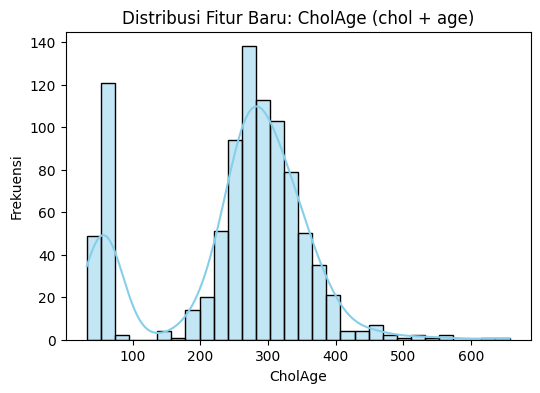

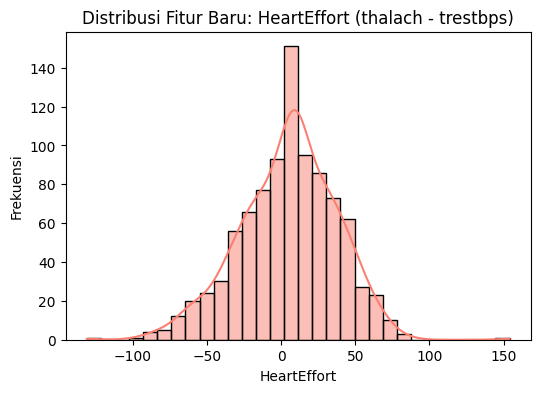

In [ ]:
df_prep['CholAge'] = df_prep['chol'] + df_prep['age']
df_prep['HeartEffort'] = df_prep['thalch'] - (df_prep['trestbps'] + 1)

plt.figure(figsize=(6,4))
sns.histplot(df_prep['CholAge'], kde=True, bins=30, color='skyblue')
plt.title("Distribusi Fitur Baru: CholAge (chol + age)")
plt.xlabel("CholAge")
plt.ylabel("Frekuensi")
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(df_prep['HeartEffort'], kde=True, bins=30, color='salmon')
plt.title("Distribusi Fitur Baru: HeartEffort (thalach - trestbps)")
plt.xlabel("HeartEffort")
plt.ylabel("Frekuensi")
plt.show()

#**6. Standarisasi Data**

In [ ]:
drop_cols = ['id', 'sex', 'dataset', 'cp', 'restecg', 'slope', 'thal']

features = [c for c in df_prep.select_dtypes(include=[np.number]).columns if c not in drop_cols]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_prep[features])

print("Fitur yang digunakan untuk scaling:", features)
print("Shape data setelah scaling:", X_scaled.shape)

Fitur yang digunakan untuk scaling: ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num', 'CholAge', 'HeartEffort']
Shape data setelah scaling: (920, 9)


#**7. Clastering dengan KMeans**

In [ ]:
best_k, best_sil, best_dbi = None, -1, None
best_kmeans_labels = None

sil_scores, dbi_scores = [], []

for k in range(2, 9):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)

    sil = silhouette_score(X_scaled, labels, sample_size=500, random_state=42)
    dbi = davies_bouldin_score(X_scaled, labels)
    sil_scores.append((k, sil))
    dbi_scores.append((k, dbi))

    if sil > best_sil:
        best_k, best_sil, best_dbi = k, sil, dbi
        best_kmeans_labels = labels

print("Silhouette by k:", sil_scores)
print("DBI by k:", dbi_scores)
print(f"\nBest KMeans: k={best_k} | Silhouette={best_sil:.4f} | DBI={best_dbi:.4f}")

Silhouette by k: [(2, np.float64(0.2296686264298912)), (3, np.float64(0.2365612099194754)), (4, np.float64(0.23322470959230224)), (5, np.float64(0.19047698925163772)), (6, np.float64(0.17863307845723056)), (7, np.float64(0.17945223144744207)), (8, np.float64(0.1703556086300803))]
DBI by k: [(2, np.float64(1.8205859258622865)), (3, np.float64(1.5603890508121634)), (4, np.float64(1.441122710334397)), (5, np.float64(1.581230448381262)), (6, np.float64(1.6406321438107485)), (7, np.float64(1.6292495227106443)), (8, np.float64(1.6238820591078769))]

Best KMeans: k=3 | Silhouette=0.2366 | DBI=1.5604


#**8. Visualisasi KMeans (PCA 2D)**

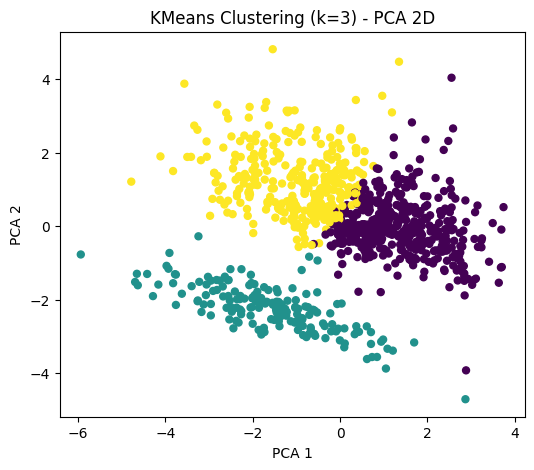

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(6,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=best_kmeans_labels, cmap='viridis', s=25)
plt.title(f"KMeans Clustering (k={best_k}) - PCA 2D")
plt.xlabel("PCA 1"); plt.ylabel("PCA 2")
plt.show()

#**9. Clustering dengan DBSCAN (Tuning Parameter)**

In [ ]:
candidate_eps = [1.0, 1.5, 2.0, 2.5, 3.0]
candidate_min_samples = [5, 10]

best_dbscan_labels = None
best_sil_db, best_dbi_db = -1, None
best_params = None
grid_results = []

for eps in candidate_eps:
    for ms in candidate_min_samples:
        dbs = DBSCAN(eps=eps, min_samples=ms)
        labels = dbs.fit_predict(X_scaled)

        if len(set(labels)) > 1:
            sil = silhouette_score(X_scaled, labels, sample_size=500, random_state=42)
            dbi = davies_bouldin_score(X_scaled, labels)
            grid_results.append((eps, ms, len(set(labels))-1, sil, dbi))

            if sil > best_sil_db:
                best_sil_db, best_dbi_db = sil, dbi
                best_params, best_dbscan_labels = (eps, ms), labels

print("\nGrid Results (eps, min_samples, n_clusters, Silhouette, DBI):")
for r in grid_results: print(r)
print(f"\nBest DBSCAN: eps={best_params[0]}, min_samples={best_params[1]} | Silhouette={best_sil_db:.4f} | DBI={best_dbi_db:.4f}")


Grid Results (eps, min_samples, n_clusters, Silhouette, DBI):
(1.0, 5, 7, np.float64(-0.10623955659451555), np.float64(1.9322085583722108))
(1.0, 10, 1, np.float64(0.07131267080392317), np.float64(2.217174324133358))
(1.5, 5, 4, np.float64(-0.012920685053617452), np.float64(3.1666261026798868))
(1.5, 10, 3, np.float64(-0.006444164171919386), np.float64(2.5006135106707505))
(2.0, 5, 2, np.float64(0.17674257472286856), np.float64(1.7916199956256509))
(2.0, 10, 1, np.float64(0.2934759518304937), np.float64(2.4314068932626594))
(2.5, 5, 1, np.float64(0.3702730397494423), np.float64(2.57287545436993))
(2.5, 10, 1, np.float64(0.3702730397494423), np.float64(2.4091260224917317))
(3.0, 5, 1, np.float64(0.3050320900817066), np.float64(2.062422531232445))
(3.0, 10, 1, np.float64(0.3050320900817066), np.float64(2.062422531232445))

Best DBSCAN: eps=2.5, min_samples=5 | Silhouette=0.3703 | DBI=2.5729


#**10. Visualisasi Hasil Tunimg DBSCAN**

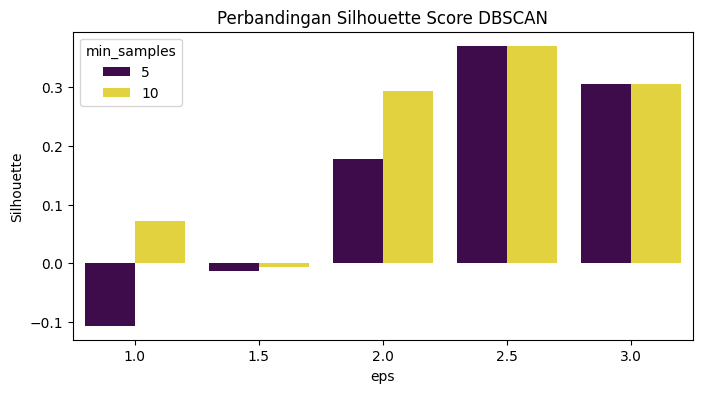

In [ ]:
results_df = pd.DataFrame(grid_results, columns=['eps','min_samples','n_clusters','Silhouette','DBI'])
plt.figure(figsize=(8,4))
sns.barplot(data=results_df, x='eps', y='Silhouette', hue='min_samples', palette='viridis')
plt.title("Perbandingan Silhouette Score DBSCAN")
plt.show()

#**11. Visualisasi DBSCAN (PCA 2D)**

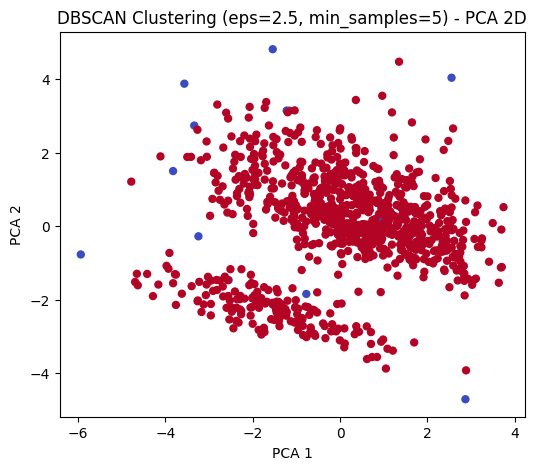

In [ ]:
if best_dbscan_labels is not None:
    plt.figure(figsize=(6,5))
    plt.scatter(X_pca[:,0], X_pca[:,1], c=best_dbscan_labels, cmap='coolwarm', s=25)
    plt.title(f"DBSCAN Clustering (eps={best_params[0]}, min_samples={best_params[1]}) - PCA 2D")
    plt.xlabel("PCA 1"); plt.ylabel("PCA 2")
    plt.show()

#**12. Approximate Nearest Neighbor (ANN) menggunakan Annnoy**

In [ ]:
dim = X_scaled.shape[1]
ann = AnnoyIndex(dim, 'euclidean')

# Build index sekali saja (sama untuk kedua model)
for i in range(X_scaled.shape[0]):
    ann.add_item(i, X_scaled[i])
ann.build(10)

# Pilih 3 titik acak sebagai query
rng = np.random.default_rng(42)
query_indices = rng.choice(X_scaled.shape[0], size=3, replace=False)

print("=== ANALISIS ANN UNTUK KMEANS ===")
for q in query_indices:
    neighbors, distances = ann.get_nns_by_item(q, 5, include_distances=True)
    cluster_q = best_kmeans_labels[q]
    print(f"\nQuery index: {q} | Cluster (KMeans): {cluster_q}")

    for n, d in zip(neighbors, distances):
        cluster_n = best_kmeans_labels[n]
        print(f"  Neighbor: {n:4d} | Dist: {d:8.4f} | Cluster (KMeans): {cluster_n}")

if 'best_dbscan_labels' in locals() and best_dbscan_labels is not None:
    print("\n=== ANALISIS ANN UNTUK DBSCAN ===")

    for q in query_indices:
        neighbors, distances = ann.get_nns_by_item(q, 5, include_distances=True)
        cluster_q = best_dbscan_labels[q]
        print(f"\nQuery index: {q} | Cluster (DBSCAN): {cluster_q}")

        for n, d in zip(neighbors, distances):
            cluster_n = best_dbscan_labels[n]
            print(f"  Neighbor: {n:4d} | Dist: {d:8.4f} | Cluster (DBSCAN): {cluster_n}")
else:
    print("\n DBSCAN belum menghasilkan cluster valid, jadi tidak bisa dianalisis dengan ANN.")

=== ANALISIS ANN UNTUK KMEANS ===

Query index: 602 | Cluster (KMeans): 1
  Neighbor:  602 | Dist:   0.0000 | Cluster (KMeans): 1
  Neighbor:  598 | Dist:   0.5858 | Cluster (KMeans): 1
  Neighbor:  761 | Dist:   0.9322 | Cluster (KMeans): 1
  Neighbor:  607 | Dist:   1.3077 | Cluster (KMeans): 1
  Neighbor:  614 | Dist:   1.4657 | Cluster (KMeans): 1

Query index: 81 | Cluster (KMeans): 0
  Neighbor:   81 | Dist:   0.0000 | Cluster (KMeans): 0
  Neighbor:   89 | Dist:   0.3982 | Cluster (KMeans): 0
  Neighbor:  428 | Dist:   0.5135 | Cluster (KMeans): 0
  Neighbor:  849 | Dist:   0.5653 | Cluster (KMeans): 0
  Neighbor:  807 | Dist:   0.5666 | Cluster (KMeans): 0

Query index: 711 | Cluster (KMeans): 1
  Neighbor:  711 | Dist:   0.0000 | Cluster (KMeans): 1
  Neighbor:  742 | Dist:   0.7075 | Cluster (KMeans): 1
  Neighbor:  684 | Dist:   0.8182 | Cluster (KMeans): 1
  Neighbor:  710 | Dist:   1.0654 | Cluster (KMeans): 1
  Neighbor:  683 | Dist:   1.1091 | Cluster (KMeans): 1

=== AN

#**13. Visualisasi ANN**

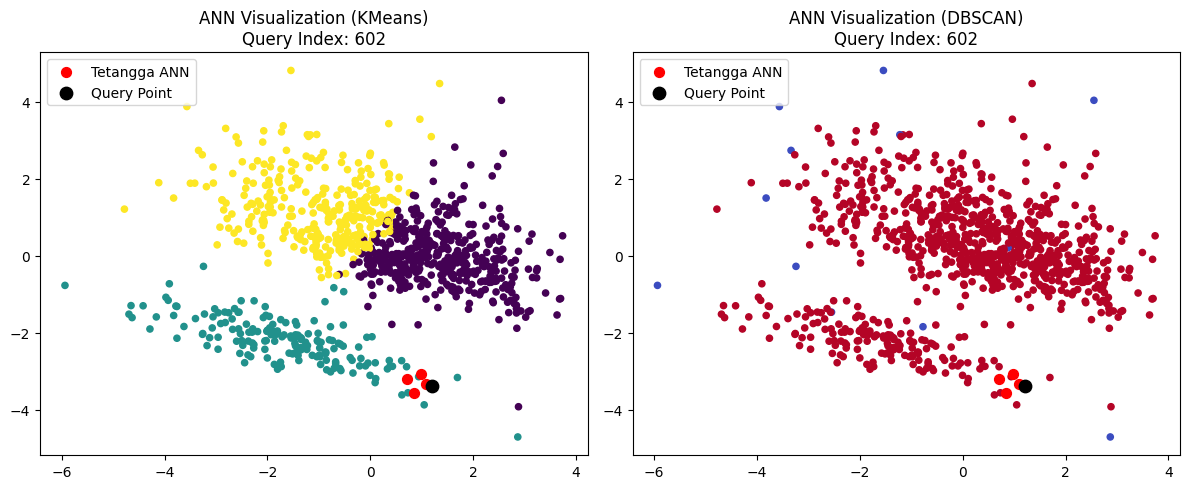

In [ ]:
query_idx = query_indices[0]
neighbors, distances = ann.get_nns_by_item(query_idx, 5, include_distances=True)

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.scatter(X_pca[:,0], X_pca[:,1], c=best_kmeans_labels, cmap='viridis', s=20)
plt.scatter(X_pca[neighbors,0], X_pca[neighbors,1], color='red', s=50, label='Tetangga ANN')
plt.scatter(X_pca[query_idx,0], X_pca[query_idx,1], color='black', s=80, label='Query Point')
plt.legend()
plt.title(f"ANN Visualization (KMeans)\nQuery Index: {query_idx}")

if 'best_dbscan_labels' in locals() and best_dbscan_labels is not None:
    plt.subplot(1, 2, 2)
    plt.scatter(X_pca[:,0], X_pca[:,1], c=best_dbscan_labels, cmap='coolwarm', s=20)
    plt.scatter(X_pca[neighbors,0], X_pca[neighbors,1], color='red', s=50, label='Tetangga ANN')
    plt.scatter(X_pca[query_idx,0], X_pca[query_idx,1], color='black', s=80, label='Query Point')
    plt.legend()
    plt.title(f"ANN Visualization (DBSCAN)\nQuery Index: {query_idx}")
else:
    print("DBSCAN belum menghasilkan cluster valid, tidak dapat divisualisasikan.")

plt.tight_layout()
plt.show()

#**14. Ringkasan Evaluasi**

In [ ]:
print(f"KMeans terbaik: k={best_k} | Silhouette={best_sil:.3f} | DBI={best_dbi:.3f}")
print(f"DBSCAN terbaik: eps={best_params[0]} | min_samples={best_params[1]} | Silhouette={best_sil_db:.3f} | DBI={best_dbi_db:.3f}")

KMeans terbaik: k=3 | Silhouette=0.237 | DBI=1.560
DBSCAN terbaik: eps=2.5 | min_samples=5 | Silhouette=0.370 | DBI=2.573


#**Kesimpulan**

a.	Perbedaan hasil KMeans dan DBSCAN, mana yang lebih baik diantara kedua model ini dan jelaskan jawaban anda

b.	Nilai metrik terbaik (Silhouette, DBI).

c.	Hasil query Annoy: apakah tetangga yang ditemukan termasuk dalam cluster yang sama? Jelaskan jawaban anda.

**a. Perbedaan Hasil KMeans dan DBSCAN & Model Terbaik**
- KMeans:

  - Setelah mencoba k dari 2 hingga 8, hasil terbaik (berdasarkan Silhouette Score tertinggi) ditemukan pada k=3.

  - Algoritma ini mempartisi data menjadi 3 cluster yang relatif berbeda (seperti terlihat pada visualisasi PCA).

- DBSCAN:

  - Setelah melakukan tuning parameter eps dan min_samples, kombinasi terbaik (berdasarkan Silhouette Score tertinggi yang menghasilkan lebih dari 1 "kelompok", termasuk noise) adalah eps=2.5 dan min_samples=5.

  - Hasil DBSCAN dengan parameter ini mengidentifikasi 1 cluster utama dan mengklasifikasikan banyak titik data sebagai noise (outlier). Visualisasi PCA menunjukkan satu kelompok besar dan beberapa titik pencilan.

- Mana yang Lebih Baik?

  - Secara Metrik Silhouette: DBSCAN (0.370) menghasilkan skor yang lebih tinggi daripada KMeans (0.237).

  - Secara Metrik DBI: KMeans (1.560) menghasilkan skor yang lebih baik (lebih rendah) daripada DBSCAN (2.573), menunjukkan cluster KMeans mungkin lebih kompak dan terpisah dengan baik.

  - Secara Struktur Cluster: KMeans berhasil membagi data menjadi 3 kelompok berbeda, yang mungkin lebih informatif jika tujuannya adalah segmentasi. DBSCAN lebih menonjolkan adanya satu kelompok data yang padat dan mengidentifikasi titik-titik data yang tidak termasuk dalam kelompok padat tersebut sebagai noise.

  - Kesimpulan Perbandingan: KMeans dengan k=3 menghasilkan partisi data yang lebih seimbang dan berpotensi lebih informatif dibandingkan DBSCAN. Meskipun DBSCAN mencapai Silhouette Score yang lebih tinggi, KMeans menunjukkan skor Davies-Bouldin Index (DBI) yang lebih baik, menandakan cluster yang lebih padat dan terpisah. Selain itu, KMeans berhasil membagi data menjadi tiga kelompok distinct, yang lebih berguna untuk tujuan segmentasi dibandingkan hasil DBSCAN yang hanya mengidentifikasi satu cluster besar dan banyak noise.

**b. Nilai Metrik Terbaik**
- KMeans (k=3):

  - Silhouette Score: ~0.237

  - Davies-Bouldin Index (DBI): ~1.560

- DBSCAN (eps=2.5, min_samples=5):

  - Silhouette Score: ~0.370

  - Davies-Bouldin Index (DBI): ~2.573

**c. Hasil Query Annoy**
- Annoy digunakan untuk membangun indeks dan mencari 5 tetangga terdekat untuk 3 titik data acak (indeks 602, 81, 711).

- Hasilnya konsisten untuk kedua model: Untuk setiap titik data yang di-query, semua tetangga terdekat yang ditemukan oleh Annoy termasuk dalam cluster yang sama dengan titik query itu sendiri (baik dalam hasil KMeans maupun DBSCAN).

- Penjelasan: Ini menunjukkan bahwa:

  1. Titik-titik data dalam cluster yang sama (atau dalam satu-satunya cluster utama DBSCAN) memang cenderung berdekatan dalam ruang fitur.

  2. Algoritma ANN (Annoy) berhasil secara efisien menemukan tetangga yang benar-benar dekat dalam ruang fitur yang telah distandarisasi.

  3. Struktur lokal cluster cukup koheren, setidaknya di sekitar titik-titik yang di-query.